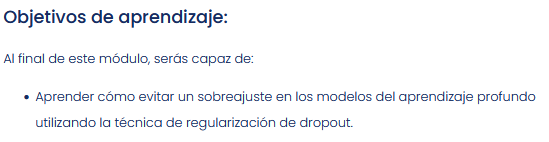

#Regularización de aprendizaje profundo

Las redes neuronales son muy propensas al sobreajuste. Para combatir esto, necesitamos regularizar para que nuestro modelo no se sobreajuste a los datos de entrenamiento y sea capaz de funcionar bien con los datos nuevos.

Las tres técnicas comunes de regularización para el aprendizaje profundo incluyen:

- Dropout
- Early stopping (parada temprana)
- Regularización L1/L2 

#Dropout

Una de las formas más comunes de regularización es dropout. Lo que hace esto es eliminar una porción de las neuronas para que el modelo no aprenda las ponderaciones y sesgos que son demasiado perfectos para el conjunto de entrenamiento. 

Visualmente, una capa de dropout se parece a esto:

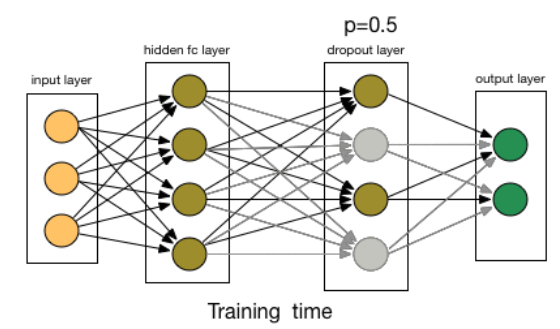

En la capa de dropout, cada neurona tiene un 50 % de probabilidad (p = 0,5) de no ser incluida/actualizada en esa época. Cuando terminemos con nuestro modelo y lo ejecutemos a través de los datos de prueba, incluiremos todas las neuronas y no abandonaremos ninguna.
#Dropout en Keras

¡Intentémoslo en Keras! Observaremos a una red neuronal con y sin dropout.

Nota: puedes mirar un video tutorial sobre este código al final de este módulo.

Monta los datos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


Obtén los datos

Utilizaremos de nuevo los datos del rookie de la NBA para predecir si creemos si un rookie durará al menos 5 años en la liga o no. Puedes descargar los datos [aquí](https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/nba.csv).

In [3]:
df = pd.read_csv("https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/nba.csv",  index_col = 'Name')
df.head()


,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Name,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [4]:
# Drop missings
df.dropna(inplace = True)
# Save X data
X = df.drop(columns = 'TARGET_5Yrs')
# Encode our target
y = df['TARGET_5Yrs']


In [5]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)


In [6]:
# Scale our data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Comparemos el rendimiento de un modelo con y sin dropout. Empezaremos creando un modelo sin dropout.

Crea una red neuronal prealimentada

In [7]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
input_shape


19

In [8]:
# Without dropout
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.7169 - val_loss: 0.6635
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6398 - val_loss: 0.6148
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6089 - val_loss: 0.5932
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5925 - val_loss: 0.5832
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5824 - val_loss: 0.5802
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5748 - val_loss: 0.5785
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5703 - val_loss: 0.5778
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5662 - val_loss: 0.5752
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5625 - val_loss: 0.5768
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5586 - val_loss: 0.5756
Epoch 11/

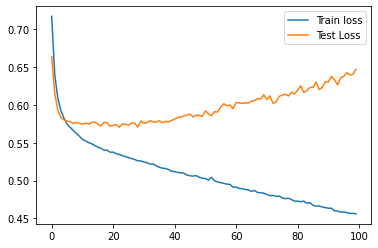

In [9]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

Caray, nuestro modelo está muy sobreajustado. Observa cómo la pérdida de entrenamiento continúa disminuyendo a medida que la pérdida en la prueba comienza a aumentar cuando aumentamos el número de épocas para las que entrenamos nuestro modelo. Este es un problema muy común con redes neuronales y nos dice que nuestro modelo está sobreajustado y que no está funcionando bien con los datos ocultos.

**Creemos este mismo modelo con dropout para intentar evitar el sobreajuste. Dropout en Keras está codificado como otra capa, después de la capa que se quiere abandonar. También debes especificar la probabilidad de dropout (la probabilidad que cada neurona individual tiene que eliminarse de abandonar el entrenamiento en esa época).**

In [10]:
# With dropout
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model.add(Dropout(.2))
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 12ms/step - loss: 0.7019 - val_loss: 0.6320
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6576 - val_loss: 0.6051
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6313 - val_loss: 0.5905
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6131 - val_loss: 0.5819
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6158 - val_loss: 0.5774
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6127 - val_loss: 0.5737
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6013 - val_loss: 0.5723
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5968 - val_loss: 0.5696
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5896 - val_loss: 0.5684
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5927 - val_loss: 0.5665
Epoch 11

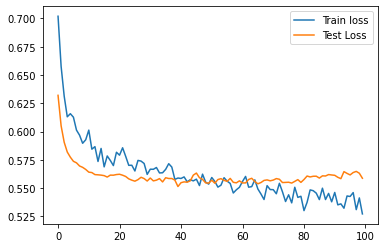

In [11]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();